In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('data/llama_validity.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
print(data.keys())

dict_keys(['/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-13b_summarisation_news_0.2.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-30b_summarisation_arxiv_0.2.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-13b_summarisation_news_0.65.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-30b_summarisation_arxiv_0.8.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-30b_summarisation_arxiv_0.65.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-13b_summarisation_arxiv_0.8.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-7b_summarisation_news_0.65.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-30b_summarisation_news_0.5.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-13b_summarisation_news_0.8.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answer_llama-30b_summarisation_arxiv_0.35.pkl', '/mnt/fast/nobackup/users/yl02706/llm_memorize/answ

## 1. The ratio of 'Yes' in dataset news

In [5]:
# Initialize two counters
count_self_info_yes = 0
count_self_info_total = 0
count_random_yes = 0
count_random_total = 0

In [6]:
# Iterate over the keys in the dictionary
for key in data.keys():
    # Only consider keys that contain 'news'
    if 'news' in key:
        # Update the counters
        count_self_info_yes += data[key]['self-info-phrase'].count('Yes')
        count_self_info_yes += data[key]['self-info-phrase'].count('Yes.')
        count_self_info_total += len(data[key]['self-info-phrase'])

        count_random_yes += data[key]['Random-phrase'].count('Yes')
        count_random_yes += data[key]['Random-phrase'].count('Yes.')
        count_random_total += len(data[key]['Random-phrase'])

In [7]:
# Calculate and print the ratios with two decimal places
print('Self-info-phrase Yes Ratio: {:.2f}'.format(count_self_info_yes / count_self_info_total))
print('Random-phrase Yes Ratio: {:.2f}'.format(count_random_yes / count_random_total))

Self-info-phrase Yes Ratio: 0.32
Random-phrase Yes Ratio: 0.18


## 2. The ratio of 'Yes' in dataset arxiv

In [13]:
# Initialize two counters
count_self_info_yes = 0
count_self_info_total = 0
count_random_yes = 0
count_random_total = 0

# Iterate over the keys in the dictionary
for key in data.keys():
    # Only consider keys that contain 'arxiv'
    if 'arxiv' in key:
        # Update the counters
        count_self_info_yes += data[key]['self-info-phrase'].count('Yes')
        count_self_info_yes += data[key]['self-info-phrase'].count('Yes.')
        count_self_info_total += len(data[key]['self-info-phrase'])

        count_random_yes += data[key]['Random-phrase'].count('Yes')
        count_random_yes += data[key]['Random-phrase'].count('Yes.')
        count_random_total += len(data[key]['Random-phrase'])

# Calculate and print the ratios with two decimal places
print('Self-info-phrase Yes Ratio: {:.2f}'.format(count_self_info_yes / count_self_info_total))
print('Random-phrase Yes Ratio: {:.2f}'.format(count_random_yes / count_random_total))

Self-info-phrase Yes Ratio: 0.31
Random-phrase Yes Ratio: 0.25


## 3. Show the ratio of 'Yes' in defferent reduction

In [15]:
# Initialize dictionaries to store reduction rates and counts
arxiv_ratios = {0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}
news_ratios = {0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]

In [16]:
# Iterate over the keys in the dictionary
for key in data.keys():
    # Extract reduction rate
    reduction = float(key.split('_')[-1].split('.pkl')[0])

    # Calculate ratio of 'Yes' for 'self-info-phrase'
    count_yes = data[key]['self-info-phrase'].count('Yes')
    count_yes += data[key]['self-info-phrase'].count('Yes.')
    total = len(data[key]['self-info-phrase'])
    ratio = count_yes / total

    # Store ratio in the appropriate dictionary
    if 'arxiv' in key:
        arxiv_ratios[reduction].append(ratio)
    elif 'news' in key:
        news_ratios[reduction].append(ratio)
arxiv_ratios,news_ratios

({0.2: [0.14, 0.5, 0.5],
  0.35: [0.14, 0.43, 0.44],
  0.5: [0.08, 0.48, 0.36],
  0.65: [0.13, 0.38, 0.31],
  0.8: [0.15, 0.33, 0.27]},
 {0.2: [0.37, 0.56, 0.41],
  0.35: [0.31, 0.47, 0.44],
  0.5: [0.32, 0.41, 0.19],
  0.65: [0.37, 0.13, 0.24],
  0.8: [0.3, 0.1, 0.18]})

In [17]:
# Calculate average ratios
arxiv_avg_ratios = [np.mean(arxiv_ratios[reduction]) for reduction in sorted(arxiv_ratios)]
news_avg_ratios = [np.mean(news_ratios[reduction]) for reduction in sorted(news_ratios)]
arxiv_avg_ratios,news_avg_ratios


([0.38000000000000006,
  0.33666666666666667,
  0.30666666666666664,
  0.2733333333333334,
  0.25],
 [0.4466666666666667,
  0.4066666666666667,
  0.30666666666666664,
  0.24666666666666667,
  0.19333333333333336])

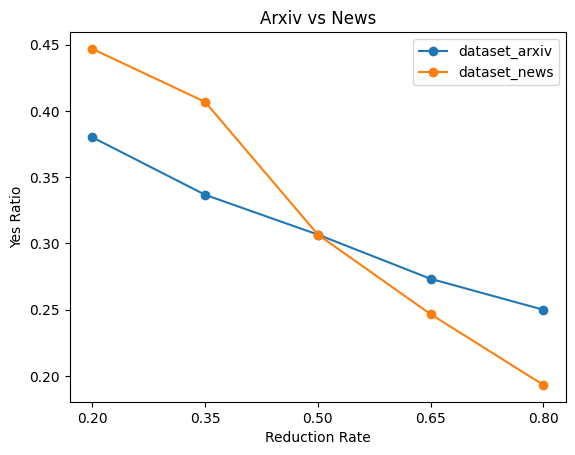

In [18]:
# Plot results
plt.plot(sorted(arxiv_ratios), arxiv_avg_ratios,'o-', label='dataset_arxiv')
plt.plot(sorted(news_ratios), news_avg_ratios,'o-', label='dataset_news')


# Add labels and title
plt.xlabel('Reduction Rate')
plt.ylabel('Yes Ratio')
plt.title('Arxiv vs News')
plt.xticks(reduction_values)
plt.legend()

plt.show()